In [337]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, multilabel_confusion_matrix, accuracy_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import tree

In [309]:
df = pd.read_csv("/content/wine.data")
df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [310]:
print("Количество семплов:", df.shape[0]-1)
print("Типы данных в ячейках:")
df.dtypes

Количество семплов: 177
Типы данных в ячейках:


Class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

Распределение:


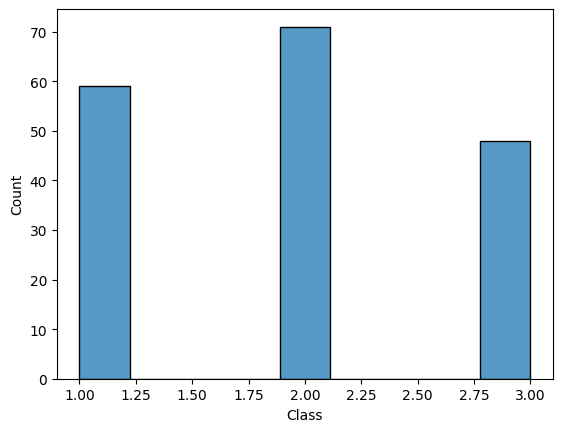

In [311]:
print("Распределение:")
sns.histplot(df["Class"])
plt.show()

Корреляция:


<Axes: >

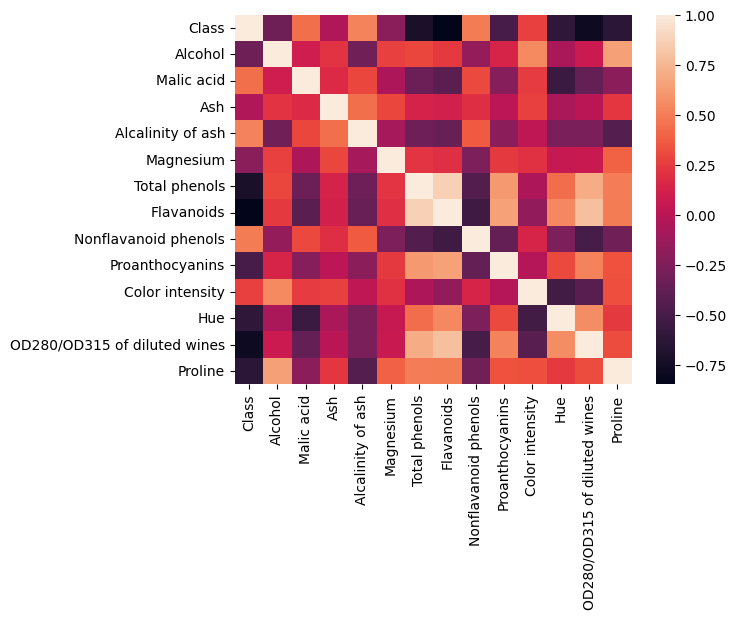

In [312]:
print("Корреляция:")
sns.heatmap(df.corr())

In [313]:
print("Корреляция Class с остальными признаками:")
correl = df.corr().sort_values(["Class"])
correl["Class"]

Корреляция Class с остальными признаками:


Flavanoids                     -0.847498
OD280/OD315 of diluted wines   -0.788230
Total phenols                  -0.719163
Proline                        -0.633717
Hue                            -0.617369
Proanthocyanins                -0.499130
Alcohol                        -0.328222
Magnesium                      -0.209179
Ash                            -0.049643
Color intensity                 0.265668
Malic acid                      0.437776
Nonflavanoid phenols            0.489109
Alcalinity of ash               0.517859
Class                           1.000000
Name: Class, dtype: float64

In [327]:
max_correl_1 = correl.index[-2]
max_correl_2 = correl.index[-3]
min_correl_1 = correl.index[0]
min_correl_2 = correl.index[1]
print("Два самых коррелирующих с Class признака:")
print(max_correl_1)
print(max_correl_2)
print("Два самых не коррелирующих с Class признака:")
print(min_correl_1)
print(min_correl_2)

Два самых коррелирующих с Class признака:
Alcalinity of ash
Nonflavanoid phenols
Два самых не коррелирующих с Class признака:
Flavanoids
OD280/OD315 of diluted wines


In [330]:
df_correl_max = df[["Class", max_correl_1, max_correl_2]]
print(df_correl_max)
df_correl_min = df[["Class", min_correl_1, min_correl_2]]
print(df_correl_min)

     Class  Alcalinity of ash  Nonflavanoid phenols
0        1               15.6                  0.28
1        1               11.2                  0.26
2        1               18.6                  0.30
3        1               16.8                  0.24
4        1               21.0                  0.39
..     ...                ...                   ...
173      3               20.5                  0.52
174      3               23.0                  0.43
175      3               20.0                  0.43
176      3               20.0                  0.53
177      3               24.5                  0.56

[178 rows x 3 columns]
     Class  Flavanoids  OD280/OD315 of diluted wines
0        1        3.06                          3.92
1        1        2.76                          3.40
2        1        3.24                          3.17
3        1        3.49                          3.45
4        1        2.69                          2.93
..     ...         ...            

In [328]:
print("Проверка на пустоту:")
count_NaN = df.isna().sum()
count_NaN

Проверка на пустоту:


Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [331]:
target = "Class"
X_max = df_correl_max.drop(columns=[target])
X_min = df_correl_min.drop(columns=[target])
y = df[target]
y = pd.get_dummies(y, prefix="Class")
X_train_max, X_test_max, y_train_max, y_test_max = train_test_split(X_max, y, test_size=0.2, random_state=42)
X_train_min, X_test_min, y_train_min, y_test_min = train_test_split(X_min, y, test_size=0.2, random_state=42)

In [333]:
dt_max = tree.DecisionTreeClassifier(criterion='gini')
dt_min = tree.DecisionTreeClassifier(criterion='gini')

In [334]:
dt_max = dt_max.fit(X_train_max, y_train_max)
dt_min = dt_min.fit(X_train_min, y_train_min)

In [336]:
y_max_predicted = dt_max.predict(X_test_max)
y_min_predicted = dt_min.predict(X_test_min)

In [338]:
acc_max = accuracy_score(y_test_max, y_max_predicted)
acc_min = accuracy_score(y_test_min, y_min_predicted)
report_max = classification_report(y_test_max, dt_max.predict(X_test_max), target_names=['1', '2', '3'])
report_min = classification_report(y_test_min, dt_min.predict(X_test_min), target_names=['1', '2', '3'])
print("Accuracy (max):", acc_max, '\n', report_max)
print("Accuracy (min):", acc_min, '\n', report_min)

Accuracy (max): 0.4722222222222222 
               precision    recall  f1-score   support

           1       0.62      0.57      0.59        14
           2       0.42      0.36      0.38        14
           3       0.50      0.50      0.50         8

   micro avg       0.52      0.47      0.49        36
   macro avg       0.51      0.48      0.49        36
weighted avg       0.51      0.47      0.49        36
 samples avg       0.47      0.47      0.47        36

Accuracy (min): 0.6388888888888888 
               precision    recall  f1-score   support

           1       0.71      0.71      0.71        14
           2       0.53      0.64      0.58        14
           3       0.80      0.50      0.62         8

   micro avg       0.64      0.64      0.64        36
   macro avg       0.68      0.62      0.64        36
weighted avg       0.66      0.64      0.64        36
 samples avg       0.64      0.64      0.64        36



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


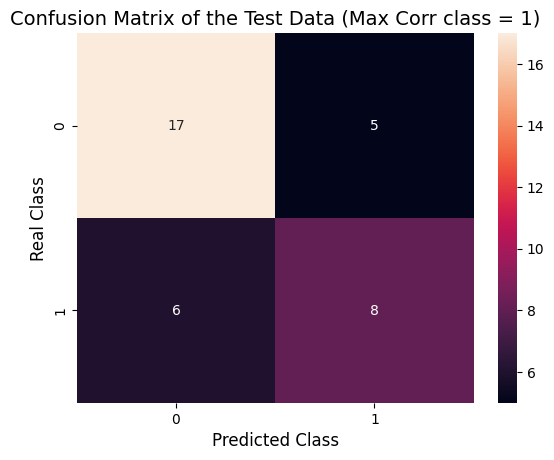

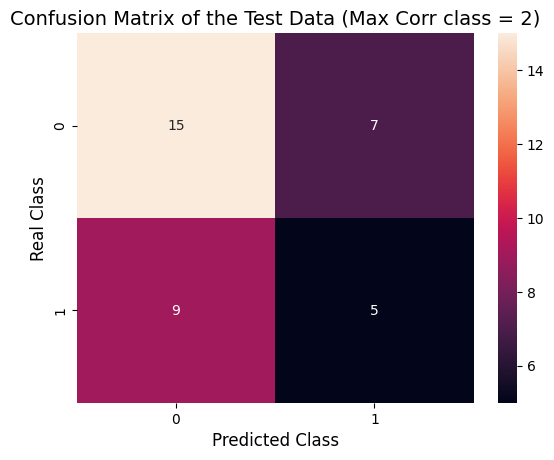

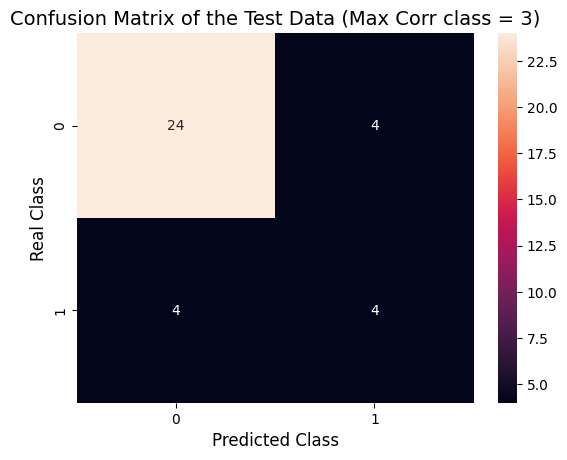

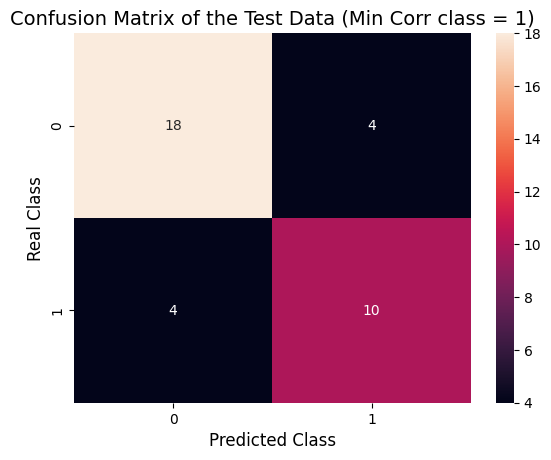

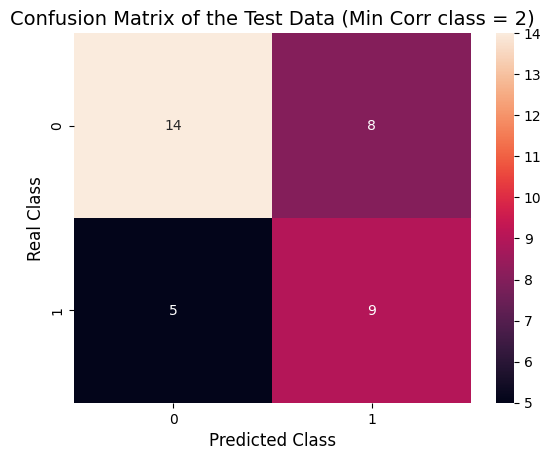

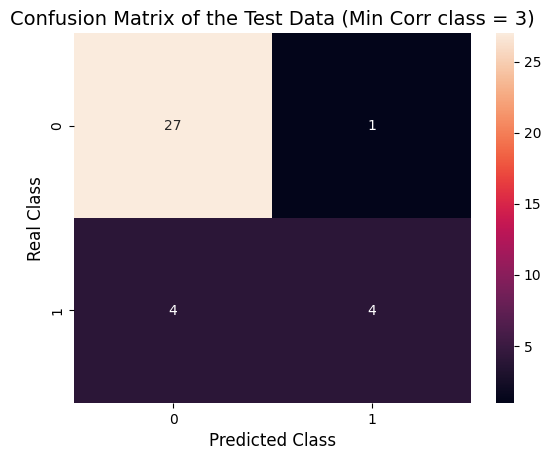

In [339]:
confusion_matrix_max = multilabel_confusion_matrix(y_test_max,  y_max_predicted)
confusion_matrix_min = multilabel_confusion_matrix(y_test_min, y_min_predicted)

sns.heatmap(confusion_matrix_max[0], annot=True, fmt='g')
plt.title('Confusion Matrix of the Test Data (Max Corr class = 1)', fontsize=14)
plt.ylabel('Real Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.show()

sns.heatmap(confusion_matrix_max[1], annot=True, fmt='g')
plt.title('Confusion Matrix of the Test Data (Max Corr class = 2)', fontsize=14)
plt.ylabel('Real Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.show()

sns.heatmap(confusion_matrix_max[2], annot=True, fmt='g')
plt.title('Confusion Matrix of the Test Data (Max Corr class = 3)', fontsize=14)
plt.ylabel('Real Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.show()

sns.heatmap(confusion_matrix_min[0], annot=True, fmt='g')
plt.title('Confusion Matrix of the Test Data (Min Corr class = 1)', fontsize=14)
plt.ylabel('Real Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.show()

sns.heatmap(confusion_matrix_min[1], annot=True, fmt='g')
plt.title('Confusion Matrix of the Test Data (Min Corr class = 2)', fontsize=14)
plt.ylabel('Real Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.show()

sns.heatmap(confusion_matrix_min[2], annot=True, fmt='g')
plt.title('Confusion Matrix of the Test Data (Min Corr class = 3)', fontsize=14)
plt.ylabel('Real Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.show()

In [324]:
X = df.drop(['Class'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_1 = svm.SVC(kernel='linear', probability=True)
clf_1.fit(X_train, y_train["Class_1"])
predictions_svm_1 = clf_1.predict(X_test)
acc_svm_1 = accuracy_score(y_test["Class_1"], predictions_svm_1)
print("Accuracy of SVM Model (Class_1):", acc_svm_1)
report_1 = classification_report(y_test["Class_1"], predictions_svm_1)
print(report_1)

clf_2 = svm.SVC(kernel='linear', probability=True)
clf_2.fit(X_train, y_train["Class_2"])
predictions_svm_2 = clf_2.predict(X_test)
acc_svm_2 = accuracy_score(y_test["Class_2"], predictions_svm_2)
print("Accuracy of SVM Model (Class_2):", acc_svm_2)
report_2 = classification_report(y_test["Class_2"], predictions_svm_2)
print(report_2)

clf_3 = svm.SVC(kernel='linear', probability=True)
clf_3.fit(X_train, y_train["Class_3"])
predictions_svm_3 = clf_3.predict(X_test)
acc_svm_3 = accuracy_score(y_test["Class_3"], predictions_svm_3)
print("Accuracy of SVM Model (Class_3):", acc_svm_3)
report_3 = classification_report(y_test["Class_3"], predictions_svm_3)
print(report_3)

Accuracy of SVM Model (Class_1): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        14

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Accuracy of SVM Model (Class_2): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        14

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Accuracy of SVM Model (Class_3): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg     

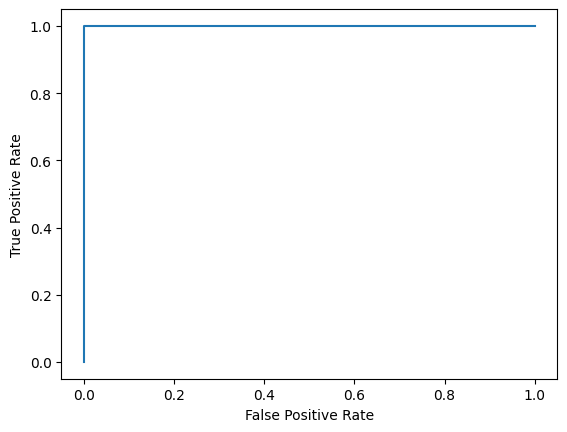

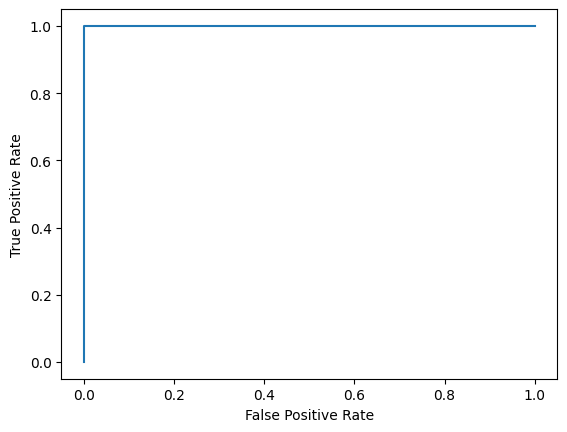

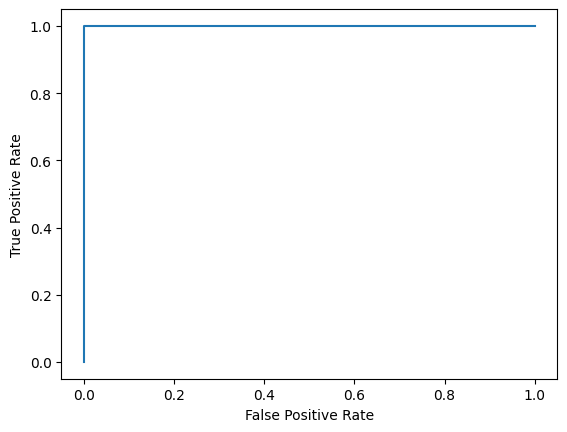

In [325]:
fpr, tpr, _ = roc_curve(y_test["Class_1"], predictions_svm_1)
plt.plot (fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

fpr, tpr, _ = roc_curve(y_test["Class_2"], predictions_svm_2)
plt.plot (fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

fpr, tpr, _ = roc_curve(y_test["Class_3"], predictions_svm_3)
plt.plot (fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()